In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
d = pd.read_csv('fluct_6400000.000000_0.000000_100_0.010000.txt')

In [9]:
d

,x,y
0,6400000.0,0.0
1,6400000.0,-256000.0
2,6397440.0,-512000.0
3,6392320.0,-767898.0
4,6384640.0,-1023590.0
...,...,...
96,-2230630.0,-12261700.0
97,-2353250.0,-12172500.0
98,-2474970.0,-12078400.0
99,-2595760.0,-11979400.0


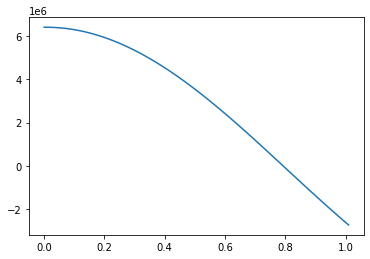

In [12]:
t = np.linspace(0, len(d)*0.01, len(d))
plt.plot(t, d.x, '-')
plt.show()